### Insight Sprint 

SOMMAIRE :

1. [Nombre d'issues par sprint](#1.-Nombre-d'issues-par-sprint)
2. [Temps passé par sprint ](#2.-Temps-passe-par-sprint)
3. [Répartition des satuts/priorité/type d'issues](#-3.-Repartition-des-satuts/priorite/type-d-issues)
4. [Répartition des projets par sprints](#4.-Repartition-des-projets-par-sprints)
5. [Temps passé par team par sprint](#5.-Temps-passe-par-team-par-sprint)
6. [Issues reportées](#6.-Issues-reporte)


In [256]:
import pandas as pd
import numpy as np
import json 
import re
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [257]:
issue_field_context = pd.read_excel('jira_issue_custom_field_contexts.xlsx')
issue_field_option = pd.read_excel('jira_issue_custom_field_options.xlsx')
issue_field = pd.read_excel ('jira_issue_field.xlsx')
issue_types = pd.read_excel('jira_issue_types.xlsx')
projects = pd.read_excel('jira_projects.xlsx')
sprint_issue = pd.read_excel ('jira_sprint_issues.xlsx')
sprint = pd.read_excel('jira_sprints.xlsx')
users = pd.read_excel('jira_users.xlsx')
users_groups = pd.read_csv('jira_user_groups_detailed_2024-09-03T06_49_22.915133Z.csv')
tempo = pd.read_csv('tempo_worklogs_all_2024-09-02T12_36_40.38184Z.csv')
issues = pd.read_excel('Jira_issue.xlsx')
#issues_customfield = pd.read_csv('Issues_avecCF_nommés.csv',encoding='ISO-8859-1', sep=',', on_bad_lines='skip')

In [ ]:
#je pars de ma table sprint_issue
#fonction parsing pour extraire le status de Fiedls
def parse_fields(fields_json):
    try:
        fields = json.loads(fields_json)  # Convertir le JSON en dictionnaire
        return pd.Series({
            'status': fields['status']['name']  #Extraire le nom du status
        })
    except (json.JSONDecodeError, KeyError):
        return pd.Series({'status': None})  # Retourner None en cas d'erreur

# extraire les status
parsed_fields = sprint_issue['fields'].apply(parse_fields)

# Vérifier si la colonne 'status' existe déjà car dès que je run ca fait une nouvelle colonne identique
if 'status' not in sprint_issue.columns:
    sprint_issue = pd.concat([sprint_issue, parsed_fields], axis=1)

sprint_issue

In [ ]:
#faire un merge entre sprint et sprint_issues pour obtenir la startdate et la enddate de chaque sprint (important pour le calcul de temps)
merged_df = pd.merge(sprint, sprint_issue, left_on='id', right_on='sprintId')
sprint_issues = merged_df
sprint_issues

In [260]:
df = issues

In [ ]:
#ajouter les customfields sur la table issues --> code Céline
# extraire les customfields de la colonne 'fields'
import json
def extract_customfields(fields):
    if isinstance(fields, str):
        try:
            fields_dict = json.loads(fields) #Le JSON est chargé dans un dictionnaire Python en utilisant json.loads().
        except json.JSONDecodeError:
            return pd.Series()
    elif isinstance(fields, dict):
        fields_dict = fields
    else:
        return pd.Series()
    customfields = {key: value for key, value in fields_dict.items() if key.startswith('customfield_')} #Les paires clé-valeur correspondantes sont stockées dans custom_fields.
    return pd.Series(customfields)
# Appliquer la fonction à la colonne 'fields', pour toutes les lignes
customfields_df = df['fields'].apply(extract_customfields)
# Fusionner les customfields extraits avec le DataFrame original
result_df_customfields = pd.concat([df, customfields_df], axis=1)
result_df_customfields

In [262]:
#drop colonne inutiles des customfields
result_df_customfields_clean = result_df_customfields.drop(columns = [
 "customfield_10019",
 "customfield_10033",
 "customfield_10052",
 "customfield_10020",
 "customfield_10024",
 "customfield_10070",
 "customfield_10012",
 "customfield_10013",
 "customfield_10017",
 "customfield_10002",
 "customfield_10063",
 "customfield_10064",
 "customfield_10065",
 "customfield_10066" ,
 "customfield_10010" ,
 "customfield_10027" ,
 "customfield_10045",
 "customfield_10123",
 "customfield_10025",
 "customfield_10021",
 "customfield_10055",
 "customfield_10082",
 "customfield_10074" ,
 "customfield_10076" ,
 "customfield_10077" ,
 "customfield_10078",
 "customfield_10079" ,
 "customfield_10080",
 "customfield_10081" ,
 "customfield_10046" ,
 "customfield_10084" ,
 "customfield_10003",
 "customfield_10109" ,
 "customfield_10086" ,
 "customfield_10087" ,
 "customfield_10089",
 "customfield_10090" ,
 "customfield_10091",
 "customfield_10092",
 "customfield_10093" ,
 "customfield_10094" ,
 "customfield_10095" ,
 "customfield_10096" ,
 "customfield_10097" ,
 "customfield_10098" ,
 "customfield_10099"  ,
 "customfield_10100"  ,
 "customfield_10101" ,
 "customfield_10085" ,
 "customfield_10083" ,
 "customfield_10034" ,
 "customfield_10035" ,
 "customfield_10106" ,
 "customfield_10118" ,
 "customfield_10120" ,
 "customfield_10122" ,
 "customfield_10107" ,
 "customfield_10130" ,
 "customfield_10054" ,
 "customfield_10000",
 "customfield_10015"
], axis = 1)
result_df_customfields_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10324 non-null  int64         
 1   key                10324 non-null  object        
 2   fields             10324 non-null  object        
 3   updated            10323 non-null  datetime64[ns]
 4   changelog          10323 non-null  object        
 5   projectId          10323 non-null  float64       
 6   projectKey         10324 non-null  object        
 7   transitions        10324 non-null  object        
 8   renderedFields     10324 non-null  object        
 9   customfield_10018  8901 non-null   object        
 10  customfield_10011  81 non-null     object        
 11  customfield_10102  262 non-null    object        
 12  customfield_10103  96 non-null     float64       
 13  customfield_10001  1988 non-null   object        
 14  custom

In [263]:
#renommer les colonnes CF restantes pour savoir à quoi elles correspondent
result_df_customfields_clean.rename(columns=
{"customfield_10018":"Parent_link",
"customfield_10011": "Epic_name",
"customfield_10102": "Road_map_produit",
"customfield_10103": "Macro_estimation_epic_heure",
"customfield_10001": "Team",
"customfield_10014" :"Epic_link",
"customfield_10043" :"Domaine_technique",
"customfield_10053" :"Criticité",
"customfield_10108" :"Responsabilité_projet",
"customfield_10104" :"Temps_consigné_tempo_epic",
"customfield_10075" :"TMA_Environement",
"customfield_10004": "Impact_sur_utilisateur"},
inplace= True)

In [264]:
issues = result_df_customfields_clean

In [ ]:
issues

In [266]:
#ajouter l'extraction des "priority" + "issue_type" de la table issues
#extraction de priority et de issuetype
def extract_priority_and_issuetype(fields):
    if isinstance(fields, str):
        try:
            fields_dict = json.loads(fields)
        except json.JSONDecodeError:
            return pd.Series({'priority': None, 'issuetype': None})
    elif isinstance(fields, dict):
        fields_dict = fields
    else:
        return pd.Series({'priority': None, 'issuetype': None})

    # Extraction des valeurs 'name' pour 'priority' et 'issuetype'
    priority = fields_dict.get('priority', {}).get('name')
    issuetype = fields_dict.get('issuetype', {}).get('name')

    return pd.Series({'priority': priority, 'issuetype': issuetype})

# Appliquer la fonction à la colonne 'fields_x' pour toutes les lignes du DataFrame 'issues'
extracted_data = issues['fields'].apply(extract_priority_and_issuetype)

# Ajouter les nouvelles colonnes 'priority' et 'issuetype' au DataFrame original
issues[['priority', 'issuetype']] = extracted_data

In [267]:
issues.info() #--> None dans priority et issuetype car pb extraction Json dans Python mais ok sur Métabase

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           10324 non-null  int64         
 1   key                          10324 non-null  object        
 2   fields                       10324 non-null  object        
 3   updated                      10323 non-null  datetime64[ns]
 4   changelog                    10323 non-null  object        
 5   projectId                    10323 non-null  float64       
 6   projectKey                   10324 non-null  object        
 7   transitions                  10324 non-null  object        
 8   renderedFields               10324 non-null  object        
 9   Parent_link                  8901 non-null   object        
 10  Epic_name                    81 non-null     object        
 11  Road_map_produit             262 non-null

In [332]:
#merge de la nouvelle table sprint_issues avec issues
merge_sprint_issues = pd.merge(sprint_issues, issues, left_on='issueId', right_on='id', how='left')
merge_sprint_issues

,id_x,name,state,endDate,startDate,completeDate,id_y,key_x,fields_x,issueId,updated_x,sprintId,status,id,key_y,fields_y,updated_y,changelog,projectId,projectKey,transitions,renderedFields,Parent_link,Epic_name,Road_map_produit,Macro_estimation_epic_heure,Team,Epic_link,Domaine_technique,Criticité,Responsabilité_projet,Temps_consigné_tempo_epic,TMA_Environement,Impact_sur_utilisateur,priority,issuetype
0,24,Sprint 60,closed,2023-04-21 08:00:00,2023-04-10 08:59:21.376,2023-04-24 11:43:36.213,24-10368,EVIAN-100,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10368,2023-06-27 12:18:50.007,24,Terminé,10368,EVIAN-100,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2023-06-27 12:18:50.007,"{""total"": 34, ""startAt"": 0, ""histories"": [{""id...",10001.0,EVIAN,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,24,Sprint 60,closed,2023-04-21 08:00:00,2023-04-10 08:59:21.376,2023-04-24 11:43:36.213,24-10379,MM-5,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10379,2023-07-17 10:02:59.597,24,Terminé,10379,MM-5,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2023-07-17 10:02:59.597,"{""total"": 22, ""startAt"": 0, ""histories"": [{""id...",10036.0,MM,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...","{'showField': True, 'hasEpicLinkFieldDependenc...",NaN,NaN,NaN,{'id': 'a05f61bd-79e3-4f30-aded-cda67ef5990b-5...,NaN,"[{'id': '10023', 'self': 'https://jira-monkeyf...",NaN,NaN,NaN,NaN,NaN,Moyenne,Bug
2,24,Sprint 60,closed,2023-04-21 08:00:00,2023-04-10 08:59:21.376,2023-04-24 11:43:36.213,24-10384,ROYAN-7,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10384,2023-04-24 10:17:10.634,24,Terminé,10384,ROYAN-7,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2023-04-24 10:17:10.634,"{""total"": 32, ""startAt"": 0, ""histories"": [{""id...",10021.0,ROYAN,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
3,24,Sprint 60,closed,2023-04-21 08:00:00,2023-04-10 08:59:21.376,2023-04-24 11:43:36.213,24-10464,MUL-24,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10464,2023-09-22 14:13:39.975,24,Terminé,10464,MUL-24,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2023-09-22 14:13:39.975,"{""total"": 36, ""startAt"": 0, ""histories"": [{""id...",10013.0,MUL,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
4,24,Sprint 60,closed,2023-04-21 08:00:00,2023-04-10 08:59:21.376,2023-04-24 11:43:36.213,24-10465,MUL-25,"{""status"": {""id"": ""10007"", ""name"": ""Terminé"", ...",10465,2023-09-22 14:12:50.940,24,Terminé,10465,MUL-25,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2023-09-22 14:12:50.940,"{""total"": 23, ""startAt"": 0, ""histories"": [{""id...",10013.0,MUL,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12460,113,Sprint 96,future,NaT,NaT,NaT,113-21850,SUPCAY-7,"{""status"": {""id"": ""10022"", ""name"": ""Planif"", ""...",21850,2024-08-26 14:41:57.059,113,Planif,21850,SUPCAY-7,"{""votes"": {""self"": ""https://jira-monkeyfactory...",2024-08-26 14:41:57.059,"{""total"": 3, ""startAt"": 0, ""histories"": [{""id""...",10089.0,SUPCAY,"[{""id"": ""61"", ""to"": {""id"": ""10015"", ""name"": ""A...","{""comment"": {""self"": ""https://jira-monkeyfacto...","{'showField': True, 'hasEpicLinkFieldDependenc...",NaN,NaN,NaN,{'id': 

In [363]:
merge_sprint_issues.to_csv('merge_sprint_issues.csv', index=False)

In [375]:
merge_sprint_issues['priority'].value_counts()

priority
Moyenne         7023
Haute           1738
TrÃ¨s haute      279
Basse            274
HOTFIX (Bug)      27
Name: count, dtype: int64

In [ ]:
tempo

In [ ]:
#extraction de Account Id table Tempo (pour joindre avec users_groups)

# Fonction pour extraire l'accountId du JSON
def extract_account_id(author_json):
    try:
        author_dict = json.loads(author_json)  # Convertir le JSON en dictionnaire
        return author_dict.get('accountId')  # Extraire l'accountId
    except (json.JSONDecodeError, TypeError):
        return None  # Retourner None en cas d'erreur

# Appliquer la fonction pour créer une nouvelle colonne 'account_id'
tempo['account_id'] = tempo['author'].apply(extract_account_id)

print(tempo[['author', 'account_id']])

In [ ]:
#Suppression des colonnes inutiles de TEMPO
# colonnes existantes
print("Colonnes existantes dans le DataFrame :")
print(tempo.columns.tolist())

#colonnes à supprimer
columns_to_drop = ['self', 'createdAt', '_airbyte_raw_id', '_airbyte_extracted_at', '_airbyte_meta']
# Suppression des colonnes spécifiques 
tempo = tempo.drop(columns=columns_to_drop, errors='ignore')

In [272]:
#extraction des ID de TEMPO (pour faire le merge après)
def extract_id(issue_json):
    try:
        issue_dict = json.loads(issue_json)  # Convertir le JSON en dictionnaire
        return issue_dict.get('id')  # Extraire l'ID
    except (json.JSONDecodeError, TypeError):
        return None  # Retourner None en cas d'erreur

# Appliquer la fonction pour créer une nouvelle colonne 'issue_id'
tempo['issue_id'] = tempo['issue'].apply(extract_id)

In [ ]:
tempo

In [274]:
tempo['timeSpentSeconds'] = tempo['timeSpentSeconds'].str.replace(' ', '')  # Supprimer les espaces car pb dans la colonne
tempo['timeSpentSeconds'] = tempo['timeSpentSeconds'].astype(float)
tempo['timeSpentSeconds'].sum() #--> verif si ok sum vs le excel

207532080.0

In [ ]:
#merge de la nouvelle table merge_sprint_issues avec TEMPO
merge_sprint_issues_tempo = pd.merge(merge_sprint_issues, tempo, left_on='issueId', right_on='issue_id', how='left')
merge_sprint_issues_tempo.sample()

In [ ]:
result = merge_sprint_issues_tempo.loc[merge_sprint_issues_tempo['id_x'] == "prévu. De très gros soucis"]

# Afficher le résultat
print(result)

In [276]:
merge_sprint_issues_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49692 entries, 0 to 49691
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_x                         49692 non-null  int64         
 1   name                         49692 non-null  object        
 2   state                        49692 non-null  object        
 3   endDate                      49559 non-null  datetime64[ns]
 4   startDate_x                  49559 non-null  datetime64[ns]
 5   completeDate                 48412 non-null  datetime64[ns]
 6   id_y                         49692 non-null  object        
 7   key_x                        49692 non-null  object        
 8   fields_x                     49692 non-null  object        
 9   issueId                      49692 non-null  int64         
 10  updated_x                    49692 non-null  datetime64[ns]
 11  sprintId                     49692 non-nu

# 2. Temps passe par sprint 

In [ ]:
#groupby SPRINT et le temps total par sprint : la startdate du tempo worlogs doit être entre la statdate et endate du sprint, pour eviter les doublon de issues
# info importante : les 'clotures' de sprint sont parfois a cheval sur un nouveau sprint : exemple le sprint ne se cloture pas le vendredi 17h, mais parfois quelques jours/heures après 
#remettre tout au format datetime
merge_sprint_issues_tempo['startDate_x'] = pd.to_datetime(merge_sprint_issues_tempo['startDate_x'])
merge_sprint_issues_tempo['endDate'] = pd.to_datetime(merge_sprint_issues_tempo['endDate'])
merge_sprint_issues_tempo['startDate_y'] = pd.to_datetime(merge_sprint_issues_tempo['startDate_y'])

#Filtrer les lignes où startDate_y est entre startDate_x et endDate
filtered_df = merge_sprint_issues_tempo[
    (merge_sprint_issues_tempo['startDate_y'] >= merge_sprint_issues_tempo['startDate_x']) & (merge_sprint_issues_tempo['startDate_y'] <= merge_sprint_issues_tempo['endDate'])
]

timespend_sprint = filtered_df.groupby('sprintId', as_index=False)['timeSpentSeconds'].sum() #somme de timeSpentSeconds pour chaque sprintId
timespend_sprint = timespend_sprint.sort_values(by='timeSpentSeconds', ascending=False)
timespend_sprint

#voir pour pousser l'analyse 

In [278]:
#calculer les estimations commerciales 
issues[issues['Macro_estimation_epic_heure'].notnull()]['Macro_estimation_epic_heure'].sum()

11253.0

In [279]:
merge_sprint_issues_tempo['Macro_estimation_epic_heure'].notnull().sum()

25

# 6. Issues reportees

In [ ]:
#analyse pour comprendre pourquoi un issue passe d'un sprint à un autre :
# Groupby issueId et compter le nombre de sprints uniques
issue_sprint_count = merge_sprint_issues.groupby('issueId')['id_x'].nunique().reset_index()
issue_sprint_count = issue_sprint_count.rename(columns={'id_x': 'sprint_count'})  # Renommer la colonne 

#issues qui apparaissent dans plus de 1 sprint
issues_in_plusieurs_sprints = issue_sprint_count[issue_sprint_count['sprint_count'] > 1]

#ajouter autre colonnes
issues_details = merge_sprint_issues[['issueId', 'issuetype', 'priority', 'projectKey',]].drop_duplicates()

# Joindre les détails des issues avec le comptage
issues_with_counts = issues_in_plusieurs_sprints.merge(issues_details, on='issueId', how='left')

total_issues_plusieurs_sprints = issues_with_counts.sort_values(by='priority', ascending=False) #-> voir les très hautes priorité qui n'ont pas été résolu dans un sprint
total_issues_plusieurs_sprints

#--> il y a donc 10 852 issues qui sont reportés d'un sprint à un autre, avec certaine en très haute priority
# refaire ce calcul sur le df_final

In [ ]:
merge_sprint_issues

In [371]:
total_issues_plusieurs_sprints.to_csv('total_issues_plusieurs_sprints.csv', index=False)

In [ ]:
total_issues_plusieurs_sprints['priority'].value_counts() 

In [283]:
#--> combien en moyenne d'issues sont décalées 
# Total d'issues qui passent dans plusieurs sprints
total_issues = total_issues_plusieurs_sprints['issueId'].nunique()  #issues uniques
total_sprints = merge_sprint_issues['id_x'].nunique()  #sprints uniques

#moyenne d'issues décalées par sprint
moy_issues_per_sprint = total_issues / total_sprints

print(f"Nombre total d'issues décalées : {total_issues}") #--> ici je ne sais pas si c'est le total de ligne ou la somme à prendre en compte ???????????????
print(f"Nombre total de sprints : {total_sprints}")
print(f"Moyenne d'issues décalées par sprint : {moy_issues_per_sprint:.2f}")

Nombre total d'issues décalées : 2359
Nombre total de sprints : 39
Moyenne d'issues décalées par sprint : 60.49


In [284]:
#merge de users_group a la table merge spritn issye tempo 
merge_sprint_issues_tempo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49692 entries, 0 to 49691
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_x                         49692 non-null  int64         
 1   name                         49692 non-null  object        
 2   state                        49692 non-null  object        
 3   endDate                      49559 non-null  datetime64[ns]
 4   startDate_x                  49559 non-null  datetime64[ns]
 5   completeDate                 48412 non-null  datetime64[ns]
 6   id_y                         49692 non-null  object        
 7   key_x                        49692 non-null  object        
 8   fields_x                     49692 non-null  object        
 9   issueId                      49692 non-null  int64         
 10  updated_x                    49692 non-null  datetime64[ns]
 11  sprintId                     49692 non-nu

In [380]:
merge_sprint_issues_tempo.to_csv('merge_sprint_issues_tempo.csv', index=False)

In [285]:
users_groups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809 entries, 0 to 1808
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   key                    0 non-null      float64
 1   name                   0 non-null      float64
 2   self                   1809 non-null   object 
 3   active                 1809 non-null   bool   
 4   expand                 1809 non-null   object 
 5   groups                 1809 non-null   object 
 6   locale                 1809 non-null   object 
 7   timeZone               1809 non-null   object 
 8   accountId              1809 non-null   object 
 9   avatarUrls             1809 non-null   object 
 10  accountType            1809 non-null   object 
 11  displayName            1809 non-null   object 
 12  emailAddress           1733 non-null   object 
 13  applicationRoles       1809 non-null   object 
 14  _airbyte_raw_id        1809 non-null   object 
 15  _air

In [ ]:
users_groups

In [ ]:
# Fonction pour extraire le nom de l'équipe
def extract_team_name(groups_json):
    try:
        # Convertir la chaîne JSON en dictionnaire
        groups = json.loads(groups_json)
        
        # Parcourir les éléments de la clé 'items'
        for item in groups.get('items', []):
            if 'name' in item and item['name'].startswith('team:'):
                return item['name']
    except json.JSONDecodeError:
        print(f"Erreur de décodage JSON pour: {groups_json}")
    except Exception as e:
        print(f"Erreur inattendue: {e}")
    
    return None

#fonction pour extraire le nom de l'équipe et créernouvelle colonne 'team'
users_groups['team'] = users_groups['groups'].apply(extract_team_name) #--> il y a des tickets qui sont fait par auucne team

users_groups

In [ ]:
#clean de ma table users_group
users_groups_clean = users_groups.drop(columns = [
 "key",
 "name",
 "self",
 "expand",
 "locale",
 "timeZone",
 "avatarUrls",
 "_airbyte_raw_id",
 "_airbyte_extracted_at",
 "_airbyte_meta"], axis = 1)

users_groups = users_groups_clean
users_groups

In [ ]:
#merge du df avec users_groups pour avoir les groupes (sur accoundID)
df_final = pd.merge(merge_sprint_issues_tempo, users_groups, left_on='account_id', right_on='accountId', how='left')
df_final

In [364]:
df_final.to_csv('df_final.csv', index=False)


In [362]:
df_final.columns

Index(['id_x', 'name', 'state', 'endDate', 'startDate_x', 'completeDate',
       'id_y', 'key_x', 'fields_x', 'issueId', 'updated_x', 'sprintId',
       'status', 'id', 'key_y', 'fields_y', 'updated_y', 'changelog',
       'projectId', 'projectKey', 'transitions', 'renderedFields',
       'Parent_link', 'Epic_name', 'Road_map_produit',
       'Macro_estimation_epic_heure', 'Team', 'Epic_link', 'Domaine_technique',
       'Criticité', 'Responsabilité_projet', 'Temps_consigné_tempo_epic',
       'TMA_Environement', 'Impact_sur_utilisateur', 'priority', 'issuetype',
       'issue', 'author', 'startDate_y', 'startTime', 'updatedAt',
       'attributes', 'description', 'tempoWorklogId', 'billableSeconds',
       'timeSpentSeconds', 'account_id', 'issue_id', 'active', 'groups',
       'accountId', 'accountType', 'displayName', 'emailAddress',
       'applicationRoles', 'team'],
      dtype='object')

In [376]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49692 entries, 0 to 49691
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_x                         49692 non-null  int64         
 1   name                         49692 non-null  object        
 2   state                        49692 non-null  object        
 3   endDate                      49559 non-null  datetime64[ns]
 4   startDate_x                  49559 non-null  datetime64[ns]
 5   completeDate                 48412 non-null  datetime64[ns]
 6   id_y                         49692 non-null  object        
 7   key_x                        49692 non-null  object        
 8   fields_x                     49692 non-null  object        
 9   issueId                      49692 non-null  int64         
 10  updated_x                    49692 non-null  datetime64[ns]
 11  sprintId                     49692 non-nu

# 1. Nombre d'issues par sprint

In [ ]:
merge_sprint_issues

In [372]:
merge_sprint_issues['issuetype'].value_counts()

issuetype
Tache technique    5496
Bug                1887
Story              1229
[TMA] Bug           590
[TMA] Story          52
Epic                 36
MÃ©tier              19
Planning  TMA        16
DÃ©ploiement         11
[TMA] MÃ©tier         5
Name: count, dtype: int64

In [291]:
#calculer le nombre d'issues en moyenne par sprint (déceler les sprints chargé en tickets)
# le lier avec les temps passé par sprint

In [ ]:
nb_issue_sprint = merge_sprint_issues.groupby('name')['issueId'].count().sort_values(ascending=False)
nb_issue_sprint
#INFORMATION : Premier SprintID = 24   Dernier = 112(113 en cours)   donc au total il y en a 39   #regarder les temps par tickets/sprints
#nombre de tâche par sprint

In [ ]:
#lier le résultat du dessus avec les temps passés par sprint (les temps renseigné dans Worklogs qui se situent dans la durée du sprint)
#fusionner les df 
#réinitialiser l'index de nb_issue_sprint si ce n'est pas déjà fait

# Vérification des colonnes dans merge_sprint_issues
print("Colonnes dans merge_sprint_issues:", merge_sprint_issues.columns)

# Si 'name' n'est pas dans merge_sprint_issues, essayons de le trouver
if 'name' not in merge_sprint_issues.columns:
    possible_name_columns = [col for col in merge_sprint_issues.columns if 'name' in col.lower()]
    if possible_name_columns:
        print(f"Colonne 'name' non trouvée. Utilisation de '{possible_name_columns[0]}' à la place.")
        name_column = possible_name_columns[0]
    else:
        print("Aucune colonne 'name' trouvée. Utilisation de 'sprintId' uniquement.")
        name_column = None
else:
    name_column = 'name'

# Grouper par sprintId (et name si disponible)
groupby_columns = ['sprintId', name_column] if name_column else ['sprintId']
nb_issue_sprint = merge_sprint_issues.groupby(groupby_columns)['issueId'].count().reset_index(name='nb_issues')

# Grouper par sprintId (et name si disponible) pour obtenir les dates
dates_sprint = merge_sprint_issues.groupby(groupby_columns).agg({
    'startDate': 'first',
    'endDate': 'first',
    'completeDate': 'first'
}).reset_index()

# Vérification des colonnes dans timespend_sprint
print("Colonnes dans timespend_sprint:", timespend_sprint.columns)

# Fusionner avec timespend_sprint
merge_columns = groupby_columns if name_column in timespend_sprint.columns else ['sprintId']
merged_df = pd.merge(nb_issue_sprint, timespend_sprint, on=merge_columns, how='outer')

# Fusionner avec les dates
merged_df = pd.merge(merged_df, dates_sprint, on=groupby_columns, how='outer')

# Trier le DataFrame
merged_df = merged_df.sort_values(groupby_columns)

# Convertir timeSpentSeconds en heures
if 'timeSpentSeconds' in merged_df.columns:
    merged_df['timeSpentHours'] = merged_df['timeSpentSeconds'] / 3600

# Afficher le résultat
print(merged_df)

In [540]:
merged_df.to_csv('merged_df.csv', index=False)

In [ ]:
# Créer la figure et les axes
fig, ax1 = plt.subplots(figsize=(15, 8))

# Définir la largeur des barres et les positions
bar_width = 0.35
r1 = np.arange(len(merged_df))
r2 = [x + bar_width for x in r1]

# Créer les barres
ax1.bar(r1, merged_df['nb_issues'], color='skyblue', width=bar_width, label='Nombre d\'issues')
ax1.set_ylabel('Nombre d\'issues', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Créer un deuxième axe Y pour le temps passé
ax2 = ax1.twinx()
ax2.bar(r2, merged_df['timeSpentHours'], color='orange', width=bar_width, label='Temps passé (heures)')
ax2.set_ylabel('Temps passé (heures)', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Ajouter les labels de l'axe X
plt.xlabel('Sprint ID')
ax1.set_xticks([r + bar_width/2 for r in range(len(merged_df))])
ax1.set_xticklabels(merged_df['sprintId'], rotation=45, ha='right')

# Titre du graphique
plt.title('Nombre d\'issues et temps passé par sprint', fontsize=16)

# Légende
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Nombre d\'issues', 'Temps passé (heures)'], loc='upper left')

# Ajuster la mise en page
fig.tight_layout()

# Afficher le graphique
plt.show()

# Afficher le DataFrame avec toutes les informations
print(merged_df[['sprintId', 'nb_issues', 'timeSpentSeconds', 'timeSpentHours', 'startDate', 'endDate', 'completeDate']])


#cela a-t-il un impact sur le temps de developpement au total ? peut-être plus de ticket mais des tickets plus court à résoudre ? 
# ---> afficher plutot le nom du sprint et non l'ID
#ajouter le nombre par colonne sur le graphe 
#classer plutot par datee/période 

#analyse : première partie des sprints : le temps passé dépasent le nombre de tickets total (donc - de tickets mais + long a résoudre)
#deuxième partie des sprints : inversement (+ de ticket - long a résondre )
#-->aucun lien entre le nombre de ticket et le temps passé 

In [295]:
#nbr de ticket crée moyen par sprint = 320
nb_issue_sprint.mean().round()

sprintId      77.0
nb_issues    320.0
dtype: float64

# 3. Repartition des satuts/priorite/type d issues

In [ ]:
sprint_issue['status'].value_counts()   #avec le merge sprint issue, marche aussi

In [ ]:
#je mets mon résulat du dessus dans une variable
status_counts = sprint_issue['status'].value_counts()

#créer le graphe
plt.figure(figsize=(12, 10))
status_counts.plot(kind='barh')

plt.title('Répartition des tickets par statut', fontsize=16)
plt.xlabel('Nombre de tickets', fontsize=12)
plt.ylabel('Statut', fontsize=12)

# Ajouter les valeurs à la fin de chaque barre
for i, v in enumerate(status_counts):
    plt.text(v, i, f' {v}', va='center')

# mise en page
plt.tight_layout()

plt.show()


#penser a grouper les terminé, terminée, livré, deploiement a faire, a deployer
#annulé annulée
#en cours, en developpement, a developper, blocage externe, a corriger, bloqué, dev en cours
#ready préprod, ready pour code review, code review a faire, a tester
#ouvert, ticket ouvert, analyse commerciale, a spécifier
#us spécifié, a créer task
#corectif TMA a faire, a verifier par le client partenaire
# maquette a valider, a maquetter
#a planifier, planif

# filtrer les status pour des types de tâches liée au sprint, ticket en cours non terminé a ajouter au top 5


In [ ]:
statuts_a_conserver = ['Livré', 'Terminé', 'Annulé', 'Ready Préprod', 'A développer'] #j'ai gardé les 5 premiers

#je groupe les données par Sprint ID et Status
status_by_sprint = sprint_issue.groupby(['sprintId', 'status']).size().unstack(fill_value=0)

#ne garder que les statuts sélectionnés
status_by_sprint_filtered = status_by_sprint[statuts_a_conserver]

# Normaliser les données pour obtenir des pourcentages
status_by_sprint_pct = status_by_sprint_filtered.div(status_by_sprint_filtered.sum(axis=1), axis=0)

# Créer le graphique
plt.figure(figsize=(15, 10))
ax = status_by_sprint_pct.plot(kind='barh', stacked=True, colormap='Set1')

plt.title('Répartition des statuts principaux par Sprint ID', fontsize=16)
plt.xlabel('Pourcentage de répartition', fontsize=12)
plt.ylabel('Sprint ID', fontsize=12)
plt.legend(title='Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()

plt.show()

#intéressant de voir ce qu'il s'est passé au sprint 26 et 27 

# --> afficher par usersstory et bug(dans le issues_type) (faire une fenetre sur powerBi) 
# (c'est uniquement ces 2 éléments qu'on retrouve dans le sprint)
# rajouter les temps réel a chaque fois

In [299]:
#ici faire un total sur powerBi par statuts : pour avoir la moyenne des issues des tickets livré....annulé...qui passent d'un sprint à un autre

In [ ]:
print(merge_sprint_issues_tempo['issuetype'].value_counts()) #attention donnée faussée car beaucoup de Nan (au total 16 719 issue_types)

In [378]:
#je supprime momentanément les données vide du timespendsec, pour avoir le total des types d'issues sur lequel ils ont travaillé
filtered_df = merge_sprint_issues_tempo[df_final['timeSpentSeconds'].notna()]

In [ ]:
#Groupby sprintId et compter les différents types de tâche et donnée prise en compte que si "timespendsec" est renseigné
status_counts = filtered_df.groupby('name')['issuetype'].value_counts().unstack(fill_value=0)
status_counts

In [366]:
status_counts.to_csv('status_counts.csv', index=False)

In [ ]:
#Exemples des données pour le sprint 73
sprint_73_data = status_counts.loc[76] #-> #modifier ici l'Id du sprint

# Supprimer les types de tâches avec un compte de 0
sprint_73_data = sprint_73_data[sprint_73_data > 0]

# Créer le camembert
plt.figure(figsize=(12, 8))
plt.pie(sprint_73_data, labels=sprint_73_data.index, autopct='%1.1f%%', startangle=90)
plt.title(f"Répartition des types de tâches en % pour le Sprint ...\nTotal: {sprint_73_data.sum()} tâches")

plt.legend(title="Types de tâches", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout() #mep
plt.show()


#--> afficher Bug (trouvé en interne par l'équipe), TMA bug (remonté par des clients ou usager), 
# TMA story (qql chose que le client desire qui n'était pas prévu au contrat, fonctionnalité a faire après), 
# Story (nouvelle fonctionnalié porté en interne ou client)
#--> enlever tâche techniques 

In [ ]:
# Compter les occurrences de issuetype par sprintId
status_counts = filtered_df.groupby('sprintId')['issuetype'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
status_counts.plot(kind='barh', stacked=True, ax=plt.gca(), colormap='tab10')

plt.title('Répartition des types de tâches par Sprint', fontsize=16)
plt.xlabel('Nombre de tâches', fontsize=12)
plt.ylabel('Sprint ID', fontsize=12)

# valeurs à la fin de chaque barre
for i in range(status_counts.shape[0]):
    for j in range(status_counts.shape[1]):
        plt.text(status_counts.iloc[i, :j+1].sum() - status_counts.iloc[i, j] / 2, 
                 i, 
                 str(status_counts.iloc[i, j]), 
                 ha='center', 
                 va='center', 
                 color='white')

plt.legend(title='Types de tâches', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Mise en page
plt.show()

In [ ]:
#analyse sur le sprint ID78 : beaucoup de bug, faire focus sur les TMA story, TMA Bug 

In [ ]:
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]  #idem que pour issues_types, je supprime les lignes où il n'y a pas de donnée timespend
# Compter les occurrences de priority par sprintId
priority_count = filtered_df.groupby('name')['priority'].value_counts().unstack(fill_value=0)
priority_count

In [ ]:
# Filtrer les lignes sans timeSpentSeconds
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter les occurrences de priority par name (sprint name)
priority_count = filtered_df.groupby('name')['priority'].value_counts().unstack(fill_value=0)

# Réinitialiser l'index pour que 'name' devienne une colonne
priority_count = priority_count.reset_index()

# Trier le DataFrame par 'name' si nécessaire
priority_count = priority_count.sort_values('name')

priority_count

In [552]:
priority_count.to_csv('priority_count.csv', index=False)

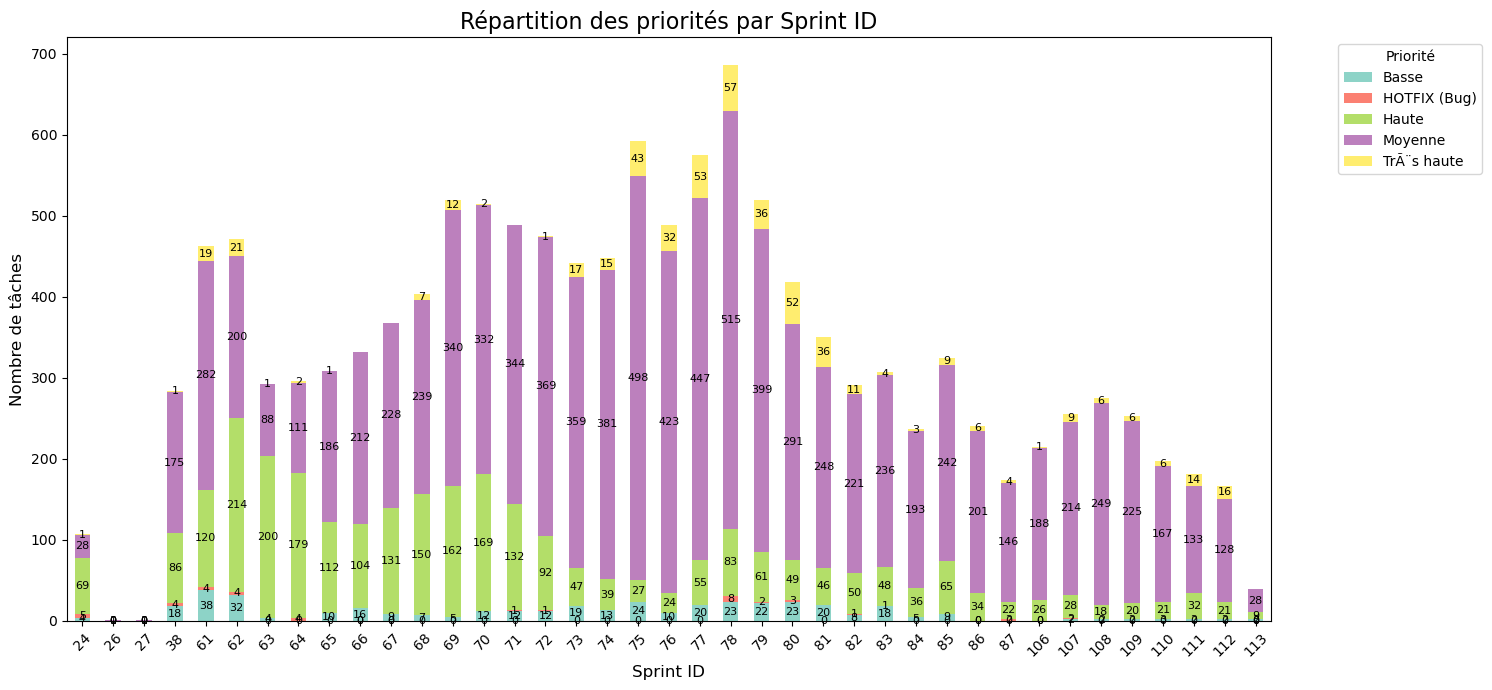

In [306]:
#Créer la figure et les axes
fig, ax = plt.subplots(figsize=(15, 7))  # ajustez la taille 

#graphique à barres empilées
priority_count.plot(kind='bar', stacked=True, ax=ax, colormap='Set3')

plt.title('Répartition des priorités par Sprint ID', fontsize=16)
plt.xlabel('Sprint ID', fontsize=12)
plt.ylabel('Nombre de tâches', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Priorité', bbox_to_anchor=(1.05, 1), loc='upper left')

#les valeurs sur les barres
for c in ax.containers:
    ax.bar_label(c, label_type='center', fontsize=8)

plt.tight_layout()
plt.show()

#--> afficher le nom des sprints 
#--> regarder si toutes les Hotfix, très hautes et hautes s'ils sont tous terminés par sprints (--> vérifier si tous les devs se concentrent sur les priorités)
#mémo : faire tableau avec issus + status +  priority

# 4. Repartition des projets par sprints

In [ ]:
#obtenir le nombre de projet par sprint : sur combien de projets en même temps les équipes travaillent-elles par sprints ?
#groupby sprint et count 'project_name'
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)
print(nb_projet_sprint)

In [ ]:
# Filtrer les lignes sans timeSpentSeconds
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)

# Réinitialiser l'index pour que 'name' devienne une colonne
nb_projet_sprint = nb_projet_sprint.reset_index()

# Calculer le nombre total de projets par sprint
nb_projet_sprint['Total_Projets'] = nb_projet_sprint.iloc[:, 1:].sum(axis=1)

#filtrer 
nb_projet_sprint = nb_projet_sprint.sort_values('name')
nb_projet_sprint

In [ ]:
nb_projet_sprint

In [557]:
nb_projet_sprint.to_csv('nb_projet_sprint.csv', index=False)

In [ ]:
# Filtrer le DataFrame pour exclure les lignes où timeSpentSeconds est NaN
filtered_df = df_final[df_final['timeSpentSeconds'].notna()]

# Compter le nombre de projets par sprintId et projectKey
nb_projet_sprint = filtered_df.groupby(['name', 'projectKey']).size().unstack(fill_value=0)

# Filtrer pour garder uniquement les colonnes avec des valeurs supérieures à 0
nb_projet_sprint = nb_projet_sprint.loc[:, (nb_projet_sprint > 0).any(axis=0)]

# Créer le graphique à barres empilées
plt.figure(figsize=(16, 12))
nb_projet_sprint.plot(kind='barh', stacked=True, colormap='tab20')

plt.title('Répartition des projets par Sprint', fontsize=16)
plt.xlabel('Nombre de Projets', fontsize=12)
plt.ylabel('Sprint ID', fontsize=12)
plt.legend(title='Project Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Mise en page
plt.show()


# il serait intéressant de filtrer par statut --> s'ils sont terminés ou non et lier cela avec les couts 
#on remarque que les projets bleu clair sont concentré sur certains sprint et à l'inverse les roses pales plus étalés dans le temps
# voir si les couts sont semblables 
# on imagine qu'il y a des gros projets qui se chevauchent : Belfort, Dakar (sprint id 64 jusqu'au 78) MUL réparti dans le temps, MIGration/INT à partir du 79

In [309]:
#nbr de projet uniques par sprint
projets_par_sprint = df_final.groupby('sprintId')['projectKey'].nunique()

#en moyenne ils travaillent sur 17 projets en même temps 
moyenne_projets_par_sprint = projets_par_sprint.mean()
moyenne_projets_par_sprint

17.17948717948718

# 5. Temps passe par team par sprint

In [ ]:
#trouver les temps passés par team 
#je convertie mon timespentseconds en float
df_final['timeSpentSeconds'] = pd.to_numeric(df_final['timeSpentSeconds'], errors='coerce')

# Groupby team et sprintId, et sum timespendsec
time_per_team_sprint = df_final.groupby(['team', 'sprintId'])['timeSpentSeconds'].sum().reset_index()

#convertion enH
time_per_team_sprint['hours_spent'] = time_per_team_sprint['timeSpentSeconds'] / 3600
time_per_team_sprint

In [ ]:
# Créer un pivot table pour une vue plus structurée
pivot_table = time_per_team_sprint.pivot(index='sprintId', columns='team', values='hours_spent')
print("\nPivot Table (heures passées par équipe et par sprint):")
print(pivot_table)

# Visualisation graphique
plt.figure(figsize=(12, 6))
for team in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[team], label=team, marker='o')

plt.title("Temps passé par équipe et par sprint")
plt.xlabel("Sprint ID")
plt.ylabel("Heures passées")
plt.legend()
plt.grid(True)
plt.show()

# Statistiques supplémentaires
print("\nStatistiques par équipe:")
stats_per_team = time_per_team_sprint.groupby('team')['hours_spent'].agg(['mean', 'median', 'min', 'max'])
print(stats_per_team)

# Temps total passé par équipe
total_time_per_team = time_per_team_sprint.groupby('team')['hours_spent'].sum().sort_values(ascending=False)
print("\nTemps total passé par équipe (en heures):")
print(total_time_per_team)

In [ ]:
# Code 1: Création de merged_df
nb_issue_sprint = merge_sprint_issues.groupby('sprintId')['issueId'].count().reset_index(name='nb_issues')

dates_sprint = merge_sprint_issues.groupby('sprintId').agg({
    'startDate': 'first',
    'endDate': 'first',
    'completeDate': 'first'
}).reset_index()

merged_df = pd.merge(nb_issue_sprint, timespend_sprint, on='sprintId', how='outer')
merged_df = pd.merge(merged_df, dates_sprint, on='sprintId', how='outer')
merged_df = merged_df.sort_values('sprintId')
merged_df['timeSpentHours'] = merged_df['timeSpentSeconds'] / 3600

# Code 2: Création de time_per_team_sprint
df_final['timeSpentSeconds'] = pd.to_numeric(df_final['timeSpentSeconds'], errors='coerce')
time_per_team_sprint = df_final.groupby(['team', 'sprintId'])['timeSpentSeconds'].sum().reset_index()
time_per_team_sprint['hours_spent'] = time_per_team_sprint['timeSpentSeconds'] / 3600

# Lier les deux DataFrames
team_per_sprint = pd.merge(merged_df, time_per_team_sprint, on='sprintId', how='outer', suffixes=('_total', '_per_team'))

# Réorganiser les colonnes pour une meilleure lisibilité
columns_order = ['sprintId', 'nb_issues', 'startDate', 'endDate', 'completeDate', 
                 'timeSpentSeconds_total', 'timeSpentHours', 
                 'team', 'timeSpentSeconds_per_team', 'hours_spent']
team_per_sprint = team_per_sprint[columns_order]

# Trier le DataFrame final
team_per_sprint = final_df.sort_values(['sprintId', 'team'])

# Afficher le résultat
print(team_per_sprint)
team_per_sprint

In [ ]:
# Fonction pour vérifier et obtenir le nom de la colonne 'name'
def get_name_column(df):
    if 'name' in df.columns:
        return 'name'
    name_like_columns = [col for col in df.columns if 'name' in col.lower()]
    return name_like_columns[0] if name_like_columns else None

# Vérification des colonnes dans chaque DataFrame
print("Colonnes dans merge_sprint_issues:", merge_sprint_issues.columns)
print("Colonnes dans timespend_sprint:", timespend_sprint.columns)
print("Colonnes dans df_final:", df_final.columns)

# Obtenir le nom de la colonne 'name' pour chaque DataFrame
name_col_sprint = get_name_column(merge_sprint_issues)
name_col_timespend = get_name_column(timespend_sprint)
name_col_final = get_name_column(df_final)

# Code 1: Création de merged_df
groupby_cols = ['sprintId', name_col_sprint] if name_col_sprint else ['sprintId']
nb_issue_sprint = merge_sprint_issues.groupby(groupby_cols)['issueId'].count().reset_index(name='nb_issues')

dates_sprint = merge_sprint_issues.groupby(groupby_cols).agg({
    'startDate': 'first',
    'endDate': 'first',
    'completeDate': 'first'
}).reset_index()

merge_cols = ['sprintId', name_col_timespend] if name_col_timespend else ['sprintId']
merged_df = pd.merge(nb_issue_sprint, timespend_sprint, on=merge_cols, how='outer')
merged_df = pd.merge(merged_df, dates_sprint, on=groupby_cols, how='outer')
merged_df = merged_df.sort_values(groupby_cols)
merged_df['timeSpentHours'] = merged_df['timeSpentSeconds'] / 3600

# Code 2: Création de time_per_team_sprint
df_final['timeSpentSeconds'] = pd.to_numeric(df_final['timeSpentSeconds'], errors='coerce')
groupby_cols_final = ['team', 'sprintId', name_col_final] if name_col_final else ['team', 'sprintId']
time_per_team_sprint = df_final.groupby(groupby_cols_final)['timeSpentSeconds'].sum().reset_index()
time_per_team_sprint['hours_spent'] = time_per_team_sprint['timeSpentSeconds'] / 3600

# Lier les deux DataFrames
merge_cols_final = ['sprintId', name_col_sprint] if name_col_sprint else ['sprintId']
team_per_sprint = pd.merge(merged_df, time_per_team_sprint, on=merge_cols_final, how='outer', suffixes=('_total', '_per_team'))

# Réorganiser les colonnes pour une meilleure lisibilité
columns_order = ['sprintId']
if name_col_sprint:
    columns_order.append(name_col_sprint)
columns_order.extend(['nb_issues', 'startDate', 'endDate', 'completeDate', 
                      'timeSpentSeconds_total', 'timeSpentHours', 
                      'team', 'timeSpentSeconds_per_team', 'hours_spent'])
team_per_sprint = team_per_sprint[columns_order]

# Trier le DataFrame final
sort_cols = ['sprintId', name_col_sprint, 'team'] if name_col_sprint else ['sprintId', 'team']
team_per_sprint = team_per_sprint.sort_values(sort_cols)

# Afficher le résultat
print(team_per_sprint)
team_per_sprint

In [543]:
team_per_sprint.to_csv('team_per_sprint.csv', index=False)

In [ ]:
df_final.head()

In [ ]:
#drop colonne inutiles des customfields
df_final_clean = df_final.drop(columns = [
 "fields_x",
 "updated_x",
 "fields_y",
 "updated_y",
 "changelog",
 "transitions",
 "renderedFields",
 "issue",
 "author",
 "updatedAt",
 "attributes",
 "groups",
 "applicationRoles",
 "Parent_link",
 "Epic_name",
 "Road_map_produit",
 "Macro_estimation_epic_heure",
 "Team",
 "Epic_link",
 "Domaine_technique",
 "Criticité",
 "TMA_Environement",
 "Impact_sur_utilisateur"
], axis = 1)
df_final_clean.info()

In [ ]:
df_final_clean

In [523]:
df_final = df_final_clean

In [ ]:
df_final

In [525]:
df_final.to_csv('df_final.csv', index=False)

In [ ]:
merged_df

In [ ]:
team_per_sprint

In [ ]:
priority_count.reset_index()

In [ ]:
nb_projet_sprint

In [ ]:
total_issues_plusieurs_sprints

In [ ]:
#Assurez-vous que 'timeSpentSeconds' est numérique
df_final['timeSpentSeconds'] = pd.to_numeric(df_final['timeSpentSeconds'], errors='coerce')

# Grouper les données par sprint (name), team, et issuetype
grouped_data = df_final.groupby(['name', 'team', 'issuetype'])['timeSpentSeconds'].sum().reset_index()

# Convertir les secondes en heures
grouped_data['timeSpentHours'] = grouped_data['timeSpentSeconds'] / 3600

# Créer un pivot table pour faciliter la visualisation
pivot_table = grouped_data.pivot_table(
    values='timeSpentHours', 
    index=['name', 'team'], 
    columns='issuetype', 
    fill_value=0
)

# Calculer le total des heures par sprint et team
pivot_table['Total'] = pivot_table.sum(axis=1)

# Trier par sprint (name) et total d'heures décroissant
pivot_table = pivot_table.sort_values(['name', 'Total'], ascending=[True, False])

# Afficher le tableau pivot
print(pivot_table)

# Exporter en CSV
pivot_table.to_csv('temps_par_team_type_sprint.csv')

# Visualisation
plt.figure(figsize=(15, 10))
sns.heatmap(pivot_table.drop('Total', axis=1), annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Temps passé (heures) par Team, Type de Tâche et Sprint')
plt.tight_layout()
plt.show()

# Analyse par sprint
for sprint in pivot_table.index.get_level_values('name').unique():
    sprint_data = pivot_table.loc[sprint]
    
    plt.figure(figsize=(12, 6))
    sprint_data.drop('Total', axis=1).plot(kind='bar', stacked=True)
    plt.title(f'Répartition du temps par Team et Type de Tâche - Sprint: {sprint}')
    plt.xlabel('Team')
    plt.ylabel('Heures')
    plt.legend(title='Type de Tâche', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Analyse des tendances par type de tâche
trend_data = grouped_data.pivot_table(
    values='timeSpentHours', 
    index='name', 
    columns='issuetype', 
    aggfunc='sum'
)

plt.figure(figsize=(15, 8))
trend_data.plot(marker='o')
plt.title('Évolution du temps passé par Type de Tâche au fil des Sprints')
plt.xlabel('Sprint')
plt.ylabel('Heures')
plt.legend(title='Type de Tâche', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
pivot_table